# clustering - unsupervised learning 

## ingredients 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 

## Import and explore the data - EDA 

In [2]:
#fetch data 
arrests=pd.read_csv('USArrests.csv')

In [3]:
#preview 
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


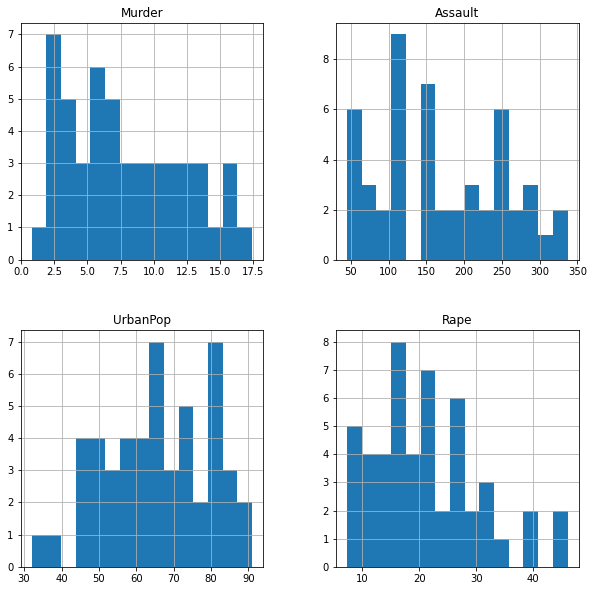

In [6]:
#look at the distribution 
arrests.hist(bins=15, figsize=(10,10));

#### awareness of KMEANS restrictions 
- everything must be numerical 
- ideally similar scales for all data points 

## reshape - state to index 

In [7]:
arrests.index=arrests.iloc[:,0]
#index location function [:,_]

In [8]:
#keep columns 2-4
arrests=arrests.iloc[:,1:5]

In [9]:
#delete header name for index
arrests.rename_axis(None,inplace=True)

In [10]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Visualise to look for patterns

+ how to show 4 numerical fields in one 2d visual ? 
+ use colour and size plus two axis 

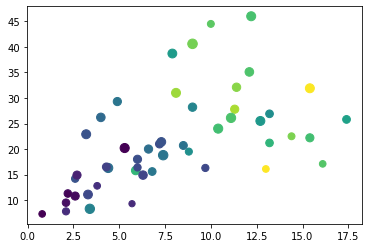

In [11]:
plt.scatter(arrests.iloc[:,0],arrests.iloc[:,3],arrests.iloc[:,2],arrests.iloc[:,1])
#x=murder, y= rape, size= urban pop, colour=assaults

+ also examined the data in tableau 
+ looked for geographical patterns - definitely visible in urban popln
+ can see some clusters potentially in the other variables 
+ we only have 50 states, so lets try clustering into 5 groups 

## Apply Clustering 

In [12]:
kmeans=KMeans(n_clusters=5)
#have to set a starting cluster number 

In [13]:
cluster=kmeans.fit(arrests)

## Explore clusters 

In [14]:
cluster.cluster_centers_

array([[ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [15]:
cluster.labels_

array([3, 3, 0, 1, 3, 1, 2, 3, 0, 1, 4, 2, 3, 2, 4, 2, 2, 3, 4, 0, 1, 3,
       4, 3, 1, 2, 2, 3, 4, 1, 3, 3, 0, 4, 2, 1, 1, 2, 1, 3, 4, 1, 1, 2,
       4, 1, 1, 4, 4, 1], dtype=int32)

In [16]:
#bring cluster into data frame
arrests_c=arrests.copy()
arrests_c['cluster']=cluster.labels_

In [17]:
arrests_c.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


## Visually explore clusters 

### 2 fields at a time with cluster on colour 

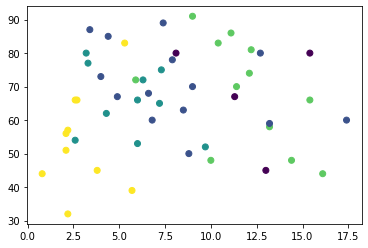

In [18]:
plt.scatter(arrests_c.iloc[:,0],arrests_c.iloc[:,2],c=arrests_c.iloc[:,4]);
# plot 2 numeric values with the cluster to examine it 

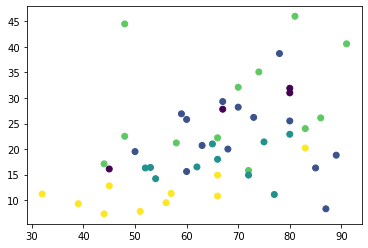

In [19]:
plt.scatter(arrests_c.iloc[:,2],arrests_c.iloc[:,3],c=arrests_c.iloc[:,4]);

### 3 d plotting with plotly 

In [20]:
arrests_c.head(1)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3


In [21]:
markersize= arrests_c['UrbanPop']
markercolour= arrests_c['cluster']

fig1=go.Scatter3d(x=arrests_c['Murder'],
                  y=arrests_c['Rape'],
                  z=arrests_c['Assault'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="Murder"),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [22]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

In [23]:
arrests_c.to_csv('arrests_c.csv')

## Scaling the data - before clustering 
+ will it make a difference 
+ we know clustering algorithms 

In [24]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
from sklearn.preprocessing import StandardScaler 

In [26]:
arrests_scaled=StandardScaler().fit_transform(arrests)

In [27]:
arrests_scaled.shape

(50, 4)

In [28]:
arrests_scaled_df=pd.DataFrame(arrests_scaled,columns=['murder','assault','pop','rape'])

In [29]:
arrests_scaled_df.head()

,murder,assault,pop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [30]:
arrests_scaled_df.describe()

,murder,assault,pop,rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


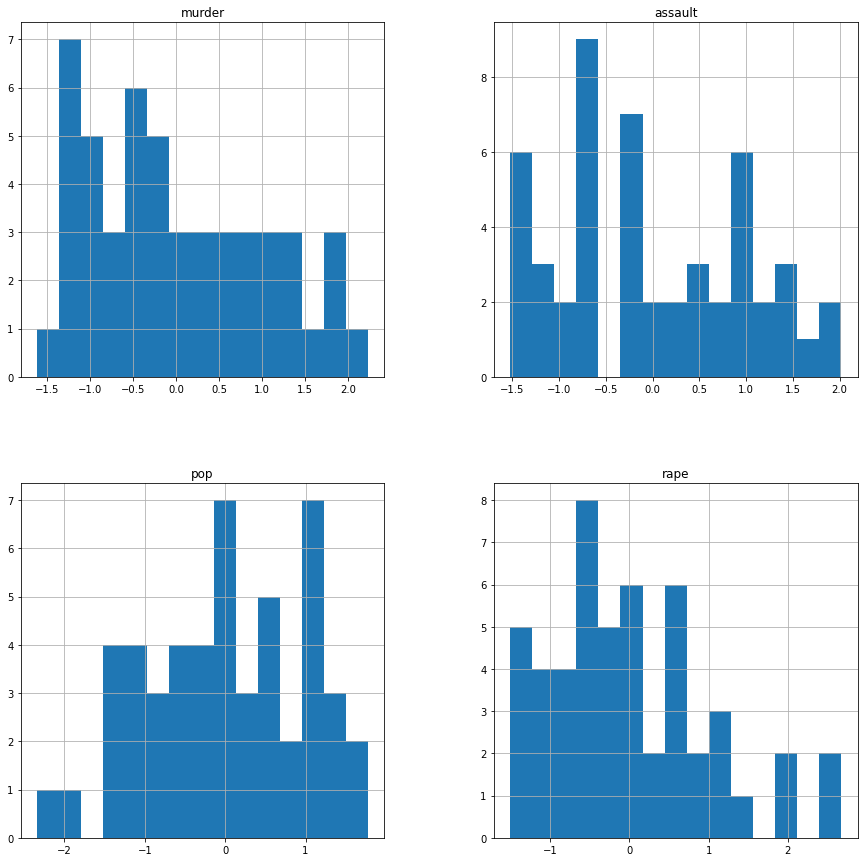

In [31]:
arrests_scaled_df.hist(bins=15, figsize=(15,15));

### Cluster after scaling

In [32]:
kmeans=KMeans(n_clusters=5)

In [33]:
cluster_scaled=kmeans.fit(arrests_scaled_df)

In [34]:
cluster_scaled.cluster_centers_

array([[-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [-0.22748551, -0.30098674, -0.01276108, -0.10667779],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ]])

In [35]:
cluster_scaled.labels_

array([4, 1, 1, 3, 1, 1, 2, 3, 1, 4, 2, 0, 1, 3, 0, 3, 3, 4, 0, 1, 2, 1,
       0, 4, 3, 0, 3, 1, 0, 2, 1, 1, 4, 0, 3, 3, 3, 3, 2, 4, 0, 4, 1, 2,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [36]:
arrests_scaled_df_c=arrests_scaled_df.copy()
arrests_scaled_df_c['cluster']=cluster_scaled.labels_

In [37]:
arrests_scaled_df_c.head()

,murder,assault,pop,rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,4
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,3
4,0.281093,1.275635,1.776781,2.088814,1


In [38]:
arrests_scaled_df_c['cluster'].value_counts()

3    14
1    12
0    11
4     7
2     6
Name: cluster, dtype: int64

In [39]:
arrests_c['cluster'].value_counts()

1    14
3    12
2    10
4    10
0     4
Name: cluster, dtype: int64

continue to investigate the clusters
- my starting assumption is I should scale before clustering 
- it appears scaling does make a difference to the assignments
- with scaling we have less extremes in cluster sizes
- i would need to assess the two cluster models visually and with maths 
- then pick whether to scale before clustering or not 

## Challenge / Activity for you 
- either using the songs or use wine data set from sklearn 
- fit a kmeans to your df - pick a reasonable k, number of clusters 

# Finding Optimal K 

In [40]:
# so far i have used 5 - arbitrarily 
# model has by default run 10 initialisations 
# small inertia/ distortion score 
# look at the scores for 5 

In [41]:
kmeans.inertia_

50.07455380829824

In [42]:
kmeans=KMeans(n_clusters=9)
kmeans.fit(arrests)
print(kmeans.inertia_)

11151.505119047619


In [43]:
K= range(2,30)
# whats the range of k you want to consider ? 

In [44]:
#gathering the k inertia values 
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(arrests)
    inertia.append(kmeans.inertia_)

print(inertia)    

[96399.02814449919, 47964.265357142845, 34728.629357142854, 24417.023523809516, 18768.000666666674, 15463.47377777778, 13436.825531746035, 11258.968674603175, 10518.078674603175, 9120.052976190476, 8242.617976190475, 7277.309166666665, 6574.119166666664, 5714.5589999999975, 5120.999666666666, 4755.671499999999, 4349.602142857143, 3852.3148333333343, 3359.395309523809, 3024.3298333333328, 2740.0336666666667, 2502.4891666666663, 2184.657, 2020.9555, 1846.8546666666664, 1659.0766666666666, 1469.883333333333, 1348.673333333333]


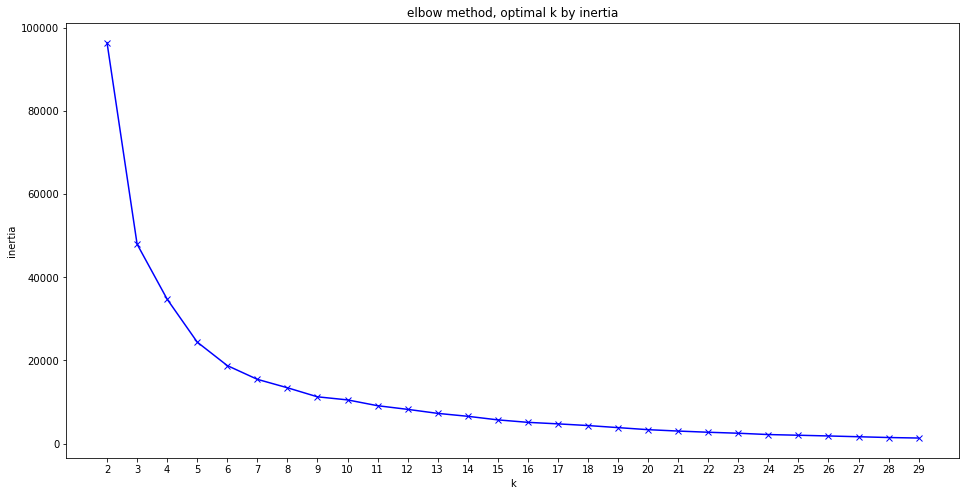

In [45]:
# plot the results 
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

In [46]:
from sklearn.metrics import silhouette_score 

In [47]:
K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(arrests)
    silhouettes.append(silhouette_score(arrests, kmeans.predict(arrests)))

Text(0, 0.5, 'silhouette score')

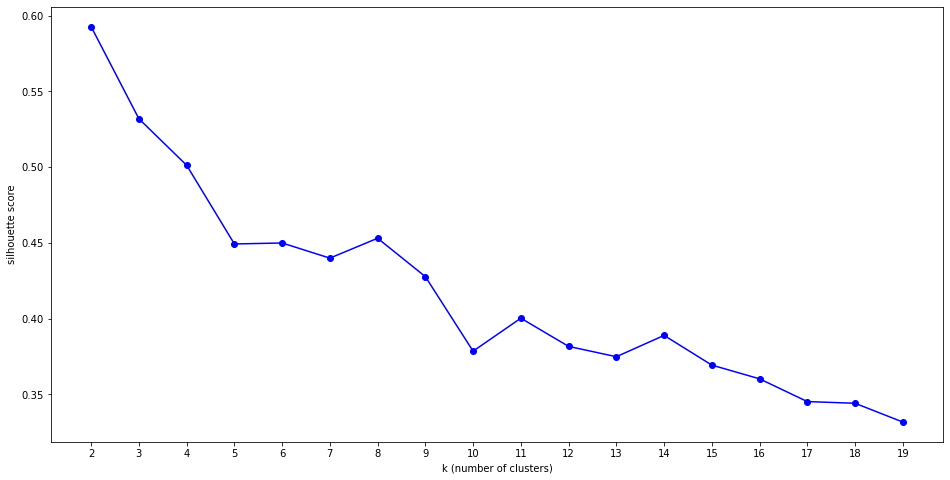

In [48]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

Findings 

+ from the inertia elbow I can see that either 3,5,6 or 9 would be good Ks
+ from the silhouette elbow I can see that either 6,8 would be good Ks
+ conclusion - use k = 6 

# Applying the clustering to a new row 

In [50]:
new=pd.read_csv('new_data.csv')

In [57]:
new

,Murder,Assault,UrbanPop,Rape
New_state,12,215,85,29


In [53]:
new.index=new.iloc[:,0]

In [55]:
new=new.iloc[:,1:5]

In [56]:
new.rename_axis(None,inplace=True)

In [78]:
c_new=kmeans.predict(new)[0]

In [79]:
c_new

3

In [82]:
# ok so this is the cluster for this new row. 
# lets get a sample state from this same cluster (random)
arrests_c.head(0)

,Murder,Assault,UrbanPop,Rape,cluster


In [86]:
arrests_c[arrests_c.cluster == c_new].sample(1)

,Murder,Assault,UrbanPop,Rape,cluster
Nevada,12.2,252,81,46.0,3
